In [14]:
#Importing data from csv
from pandas import read_csv
import pandas as pd
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
plt.rcParams['figure.dpi'] = 100
pd.set_option('display.max_columns', None)

zerg_data = read_csv('../Output/ZergMarch.csv', header=0, index_col=False)
demoZ = read_csv('../Output/wedDemoZerg.csv', header=0, index_col=False)
display(demoZ)

,match_id,map_name,region,game_length,race,enemy_race,ap30s,frame,second,player,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,baneling,banelingnest,broodling,broodlingescort,changeling,drone,creeptumor,evolutionchamber,disruptor,extractor,hatchery,hive,hydralisk,hydraliskden,infestationpit,infestor,lair,locust,mutalisk,nydusnetwork,nydusworm,overlord,queen,roach,roachwarren,spawningpool,spinecrawler,spire,sporecrawler,swarmhost,ultralisk,ultraliskcavern,viper,zergling,win
0,273,Eternal Empire LE,us,926,Z,P,0.0,1,0,Player 2 - Scarlett (Zerg),12,12.0,14,50,0,0,1050,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,273,Eternal Empire LE,us,926,Z,P,166.6,480,30,Player 2 - Scarlett (Zerg),13,14.0,14,50,699,150,1100,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,273,Eternal Empire LE,us,926,Z,P,154.0,960,60,Player 2 - Scarlett (Zerg),15,16.0,22,235,811,50,1300,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,273,Eternal Empire LE,us,926,Z,P,280.0,1440,90,Player 2 - Scarlett (Zerg),16,18.0,22,90,867,450,1350,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4,273,Eternal Empire LE,us,926,Z,P,313.6,1920,120,Player 2 - Scarlett (Zerg),16,18.0,22,75,895,775,1350,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0
5,273,Eternal Empire LE,us,926,Z,P,389.2,2400,150,Player 2 - Scarlett (Zerg),19,20.0,22,275,867,650,1575,0,0,36,156,0,0,0,0,0,0,0,0,0,21,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0
6,273,Eternal Empire LE,us,926,Z,P,145.6,2880,180,Player 2 - Scarlett (Zerg),21,26.0,28,100,895,450,2275,0,0,92,156,0,0,0,0,0,0,0,0,0,21,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0
7,273,Eternal Empire LE,us,926,Z,P,127.4,3360,210,Player 2 - Scarlett (Zerg),22,30.0,36,185,1119,450,2475,50,0,4,0,0,0,0,0,0,0,0,0,0,22,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,2,0
8,273,Eternal Empire LE,us,926,Z,P,128.8,3840,240,Player 2 - Scarlett (Zerg),25,32.0,36,110,1399,550,2925,350,0,4,0,0,0,0,0,0,0,0,0,0,26,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,3,2,0,0,1,0,0,0,0,0,0,0,2,0
9,273,Eternal Empire LE,us,926,Z,P,148.4,4320,270,Player 2 - Scarlett (Zerg),28,42.0,44,90,1483,800,3225,400,0,8,22,0,0,0,0,0,0,0,0,0,29,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,4,2,0,0,1,0,0,0,0,0,0,0,4,0


In [15]:
new_data = pd.concat([zerg_data.reset_index(drop=True), demoZ.reset_index(drop=True)], axis=0, ignore_index=True)
display(new_data)

,match_id,map_name,region,game_length,race,enemy_race,ap30s,frame,second,player,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,baneling,banelingnest,broodling,broodlingescort,changeling,drone,creeptumor,evolutionchamber,disruptor,extractor,hatchery,hive,hydralisk,hydraliskden,infestationpit,infestor,lair,locust,mutalisk,nydusnetwork,nydusworm,overlord,queen,roach,roachwarren,spawningpool,spinecrawler,spire,sporecrawler,swarmhost,ultralisk,ultraliskcavern,viper,zergling,win
0,0,Acropolis LE,us,551,Z,Z,0.0,1,0,Player 1 - soO (Zerg),12,12.0,14,50,0,0,1050,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,Acropolis LE,us,551,Z,Z,266.0,480,30,Player 1 - soO (Zerg),13,14.0,14,55,755,150,1100,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,Acropolis LE,us,551,Z,Z,210.0,960,60,Player 1 - soO (Zerg),14,16.0,22,240,839,100,1250,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,Acropolis LE,us,551,Z,Z,176.4,1440,90,Player 1 - soO (Zerg),16,18.0,22,90,867,450,1350,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,Acropolis LE,us,551,Z,Z,179.2,1920,120,Player 1 - soO (Zerg),16,18.0,22,95,923,775,1350,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81321,273,Eternal Empire LE,us,926,Z,P,168.0,18720,1170,Player 2 - Scarlett (Zerg),62,176.0,178,645,2043,1175,12325,3575,14150,127,873,475,2950,2075,3650,0,0,0,0,0,63,0,1,0,7,4,2,0,0,1,0,0,24,0,1,1,23,3,24,1,1,0,1,2,12,0,0,0,0,0
81322,273,Eternal Empire LE,us,926,Z,P,222.6,19200,1200,Player 2 - Scarlett (Zerg),62,158.0,194,905,2043,800,12050,3475,15250,293,918,150,2475,1775,4600,0,0,0,0,0,63,0,1,0,7,4,2,0,0,1,0,0,0,0,1,0,25,3,28,1,1,0,1,2,12,0,0,0,0,0
81323,273,Eternal Empire LE,us,926,Z,P,194.6,19680,1230,Player 2 - Scarlett (Zerg),62,149.0,194,735,1819,825,11575,2825,16225,76,873,375,2225,1425,5150,0,0,0,0,0,63,0,1,0,7,4,2,0,0,1,0,0,0,0,1,0,25,3,28,1,1,0,1,1,12,0,0,0,0,0
81324,273,Eternal Empire LE,us,926,Z,P,68.6,20160,1260,Player 2 - Scarlett (Zerg),61,154.0,200,710,1539,375,12125,3375,17025,188,895,125,2575,1875,5250,0,0,0,0,0,61,0,1,0,7,4,2,0,0,1,0,0,0,0,1,0,25,2,30,1,1,0,1,1,12,0,0,0,6,0


In [16]:
#Standardization

from sklearn.preprocessing import StandardScaler

no_standardize = ['match_id','map_name','region','race','enemy_race','frame','second','player','game_length','win']

#Names of Columns that we do want to Standardize
standardize_columns = [x for x in list(new_data) if x not in no_standardize]

#Standardizing these columns
stand = new_data[standardize_columns].values
stand_scaled = StandardScaler().fit_transform(stand)
zerg_data_standardized = pd.DataFrame(stand_scaled, columns=standardize_columns, index=new_data.index)

#One-hot Encoding the categorical variables
zerg_data_standardized = zerg_data_standardized.join(pd.get_dummies(new_data['map_name'], prefix='Map'))
zerg_data_standardized = zerg_data_standardized.join(pd.get_dummies(new_data['region'], prefix='Region'))
zerg_data_standardized = zerg_data_standardized.join(pd.get_dummies(new_data['enemy_race'], prefix='Enemy'))
zerg_data_standardized = zerg_data_standardized.join(new_data['win'])

#Displaying first and last 5 rows
display(zerg_data_standardized.head(5), zerg_data_standardized.tail(5))

,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,baneling,banelingnest,broodling,broodlingescort,changeling,drone,creeptumor,evolutionchamber,disruptor,extractor,hatchery,hive,hydralisk,hydraliskden,infestationpit,infestor,lair,locust,mutalisk,nydusnetwork,nydusworm,overlord,queen,roach,roachwarren,spawningpool,spinecrawler,spire,sporecrawler,swarmhost,ultralisk,ultraliskcavern,viper,zergling,Map_Acropolis LE,Map_Aura de mort EC,Map_Automaton LE,Map_Blueshift LE,Map_Cerulean Fall LE,Map_Cyber Forest LE,Map_Deathaura LE,Map_Disco Bloodbath LE,Map_Empire éternel EC,Map_Ephemeron LE,Map_Eternal Empire LE,Map_Ever Dream LE,Map_Glace et chrome EC,Map_Golden Wall LE,Map_Ice and Chrome LE,Map_Kairos Junction LE,Map_King's Cove LE,Map_Mur doré EC,Map_New Repugnancy LE,Map_Nightshade LE,Map_Para Site LE,Map_Piliers d'or EC,Map_Pillars of Gold LE,Map_Port Aleksander LE,Map_Simulacrum LE,Map_Sous-marin EC,Map_Stasis LE,Map_Submarine LE,Map_Thunderbird LE,Map_Triton LE,Map_Winter's Gate LE,Map_World of Sleepers LE,Map_Year Zero LE,Map_Zen LE,Map_冰雪合金-天梯版,Map_死亡光环-天梯版,Map_永恒帝国-天梯版,Map_永恒梦境-天梯版,Map_潜水艇-天梯版,Map_黄金之柱-天梯版,Map_黄金墙-天梯版,Map_골든 월 - 래더,Map_뉴 리퍼그넌시 - 래더,Map_데스오라 - 래더,Map_디스코 블러드배스 - 래더,Map_사이버 포레스트 - 래더,Map_서브머린 - 래더,Map_썬더버드 - 래더,Map_아이스 앤 크롬 - 래더,Map_아크로폴리스 - 래더,Map_에버 드림 - 래더,Map_월드 오브 슬리퍼스 - 래더,Map_이터널 엠파이어 - 래더,Map_이페머론 - 래더,Map_카이로스 정션 - 래더,Map_킹스 코브 - 래더,Map_트라이튼 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z,win
0,-2.008314,-1.356647,-1.221893,-1.230111,-0.472175,-2.052014,-1.571582,-1.165381,-0.916749,-0.507509,-0.52614,-1.040694,-0.619495,-0.632244,-0.592969,-0.394046,-0.338582,-0.809146,-0.094866,-0.162644,-0.122482,-1.387389,-0.079365,-0.870305,0.0,-1.145187,-1.376877,-0.610129,-0.317328,-0.443509,-0.555496,-0.153451,-0.530301,-0.06854,-0.269108,-0.24917,-0.162192,-1.149746,-1.200041,-0.517656,-0.851482,-2.744606,-0.30627,-0.474015,-0.451688,-0.12946,-0.118992,-0.192442,-0.235891,-0.683112,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,0.813810,-1.314249,-1.189833,-1.230111,-0.466463,-1.173250,-1.228843,-1.156463,-0.916749,-0.507509,-0.52614,-1.040694,-0.619495,-0.632244,-0.592969,-0.394046,-0.338582,-0.809146,-0.094866,-0.162644,-0.122482,-1.345375,-0.079365,-0.870305,0.0,-1.145187,-1.376877,-0.610129,-0.317328,-0.443509,-0.555496,-0.153451,-0.530301,-0.06854,-0.269108,-0.24917,-0.162192,-1.149746,-1.200041,-0.517656,-0.851482,-2.744606,-0.30627,-0.474015,-0.451688,-0.12946,-0.118992,-0.192442,-0.235891,-0.683112,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
2,0.219678,-1.271851,-1.157773,-1.121271,-0.255107,-1.075481,-1.343089,-1.129709,-0.916749,-0.507509,-0.52614,-1.040694,-0.619495,-0.632244,-0.592969,-0.394046,-0.338582,-0.809146,-0.094866,-0.162644,-0.122482,-1.303360,-0.079365,-0.870305,0.0,-1.145187,-1.376877,-0.610129,-0.317328,-0.443509,-0.555496,-0.153451,-0.530301,-0.06854,-0.269108,-0.24917,-0.162192,-1.039638,-1.200041,-0.517656,-0.851482,-2.744606,-0.30627,-0.474015,-0.451688,-0.12946,-0.118992,-0.192442,-0.235891,-0.683112,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,-0.136800,-1.187054,-1.125713,-1.121271,-0.426476,-1.042891,-0.543365,-1.111873,-0.916749,-0.507509,-0.52614,-1.040694,-0.619495,-0.632244,-0.592969,-0.394046,-0.338582,-0.809146,-0.094866,-0.162644,-0.122482,-1.177318,-0.079365,-0.870305,0.0,-1.145187,-0.755958,-0.610129,-0.317328,-0.443509,-0.555496,-0.153451,-0.530301,-0.06854,-0.269108,-0.24917,-0.162192,-1.039638,-1.200041,-0.517656,-0.8

,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,baneling,banelingnest,broodling,broodlingescort,changeling,drone,creeptumor,evolutionchamber,disruptor,extractor,hatchery,hive,hydralisk,hydraliskden,infestationpit,infestor,lair,locust,mutalisk,nydusnetwork,nydusworm,overlord,queen,roach,roachwarren,spawningpool,spinecrawler,spire,sporecrawler,swarmhost,ultralisk,ultraliskcavern,viper,zergling,Map_Acropolis LE,Map_Aura de mort EC,Map_Automaton LE,Map_Blueshift LE,Map_Cerulean Fall LE,Map_Cyber Forest LE,Map_Deathaura LE,Map_Disco Bloodbath LE,Map_Empire éternel EC,Map_Ephemeron LE,Map_Eternal Empire LE,Map_Ever Dream LE,Map_Glace et chrome EC,Map_Golden Wall LE,Map_Ice and Chrome LE,Map_Kairos Junction LE,Map_King's Cove LE,Map_Mur doré EC,Map_New Repugnancy LE,Map_Nightshade LE,Map_Para Site LE,Map_Piliers d'or EC,Map_Pillars of Gold LE,Map_Port Aleksander LE,Map_Simulacrum LE,Map_Sous-marin EC,Map_Stasis LE,Map_Submarine LE,Map_Thunderbird LE,Map_Triton LE,Map_Winter's Gate LE,Map_World of Sleepers LE,Map_Year Zero LE,Map_Zen LE,Map_冰雪合金-天梯版,Map_死亡光环-天梯版,Map_永恒帝国-天梯版,Map_永恒梦境-天梯版,Map_潜水艇-天梯版,Map_黄金之柱-天梯版,Map_黄金墙-天梯版,Map_골든 월 - 래더,Map_뉴 리퍼그넌시 - 래더,Map_데스오라 - 래더,Map_디스코 블러드배스 - 래더,Map_사이버 포레스트 - 래더,Map_서브머린 - 래더,Map_썬더버드 - 래더,Map_아이스 앤 크롬 - 래더,Map_아크로폴리스 - 래더,Map_에버 드림 - 래더,Map_월드 오브 슬리퍼스 - 래더,Map_이터널 엠파이어 - 래더,Map_이페머론 - 래더,Map_카이로스 정션 - 래더,Map_킹스 코브 - 래더,Map_트라이튼 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z,win
81321,-0.225920,0.763263,1.407028,1.001107,0.207592,0.325885,1.113206,0.845607,0.721053,1.489639,-0.323585,0.768086,1.297799,1.208222,0.942834,1.078528,-0.338582,-0.809146,-0.094866,-0.162644,-0.122482,0.755336,-0.079365,0.202388,0.0,0.925011,0.48588,1.746749,-0.317328,-0.443509,1.711251,-0.153451,-0.530301,17.919684,-0.269108,3.735891,3.014685,1.272621,-0.001753,1.579371,1.15001,0.35232,-0.30627,1.874433,-0.018423,6.876676,-0.118992,-0.192442,-0.235891,-0.683112,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
81322,0.353358,0.763263,1.118488,1.218787,0.504633,0.325885,0.256359,0.796558,0.675241,1.644894,-0.058827,0.861322,-0.014034,0.911876,0.720791,1.461800,-0.338582,-0.809146,-0.094866,-0.162644,-0.122482,0.755336,-0.079365,0.202388,0.0,0.925011,0.48588,1.746749,-0.317328,-0.443509,1.711251,-0.153451,-0.530301,-0.068540,-0.269108,3.735891,-0.162192,1.492836,-0.001753,1.928875,1.15001,0.35232,-0.30627,1.874433,-0.018423,6.876676,-0.118992,-0.192442,-0.235891,-0.683112,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
81323,0.056292,0.763263,0.974218,1.218787,0.310414,0.065166,0.313482,0.711838,0.377458,1.782507,-0.404926,0.768086,0.894158,0.755904,0.461739,1.683695,-0.338582,-0.809146,-0.094866,-0.162644,-0.122482,0.755336,-0.079365,0.202388,0.0,0.925011,0.48588,1.746749,-0.317328,-0.443509,1.711251,-0.153451,-0.530301,-0.068540,-0.269108,3.735891,-0.162192,1.492836,-0.001753,1.928875,1.15001,0.35232,-0.30627,1.874433,-0.235055,6.876676,-0.118992,-0.192442,-0.235891,-0.683112,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
81324,-1.280503,0.720865,1.054368,1.300417,0.281852,-0.260733,-0.714735,0.809935,0.629428,1.895420,-0.226294,0.813668,-0.114944,0.974264,0.794805,1.724039,-0.338582,-0.809146,-0.094866,-0.162644,-0.122482,0.671308,-0.079365,0.202388,0.0,0.925011,0.48588,1.746749,-0.317328,-0.443509,1.711251,-0.153451,-0.530301,-0.068540,-0.269108,3.735891,-0.162192,1.492836,-0.401183,2.103628,1.15001,0.35232,-0.30627,1.874433,-0.235055,6.876676,-0.118992,-0.192442,-0.235891,-

In [17]:
#Split data into dependent and independent variables
no_X = ['win']
yes_X = [x for x in list(zerg_data_standardized) if x not in no_X]

Y = zerg_data_standardized['win']
X_standardized = zerg_data_standardized[yes_X]

In [18]:
#Split data into training, validation and testing set
train_split = 0.8
val_split = 0.2

num_data = len(zerg_data)
num_val = int(val_split * num_data)
num_train = int(train_split * num_data)
num_test = len(demoZ)

Y_train = Y[0:num_train]
Y_val = Y[num_train:(num_train + num_val)+1]
Y_test = Y[(num_val + num_train)+1:]


X_standardized_train = X_standardized[0:num_train]
X_standardized_val = X_standardized[num_train:(num_train + num_val)+1]
X_standardized_test = X_standardized[(num_val + num_train)+1:]

In [19]:
Y_test = pd.DataFrame(Y_test)
Y_val = pd.DataFrame(Y_val)
Y_train = pd.DataFrame(Y_train)

In [20]:
Y_train = Y_train.values.reshape((-1,1))
Y_val = Y_val.values.reshape((-1,1))
Y_test = Y_test.values.reshape((-1,1))

In [21]:
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

(65025, 1)
(16257, 1)
(44, 1)


In [22]:
print(X_standardized_train.shape)
print(X_standardized_val.shape)
print(X_standardized_test.shape)

(65025, 115)
(16257, 115)
(44, 115)


In [23]:
win_length = 1
sampling_rate = 1
batch_size = 32
num_features = len(yes_X)

train_generator = TimeseriesGenerator(X_standardized_train, Y_train, length = win_length,
                                     sampling_rate=sampling_rate, batch_size = batch_size)
val_generator = TimeseriesGenerator(X_standardized_val, Y_val, length = win_length,
                                     sampling_rate=sampling_rate, batch_size = batch_size)
test_generator = TimeseriesGenerator(X_standardized_test, Y_test, length = win_length,
                                     sampling_rate=sampling_rate, batch_size = batch_size)

In [24]:
val_performance = {}
performance = {}

#Window size = 1
Y_Time = []
timer = 21;
for i in range(0,len(Y_test)-1):
    Y_Time.append(timer)
    timer += 21
    
Y_demo_test = Y_test[1:]

In [25]:
#SIMPLE RNN MODEL

simple_model = tf.keras.Sequential()
simple_model.add(tf.keras.layers.SimpleRNN(units=19, activation='sigmoid', return_sequences=True, input_shape=(win_length, num_features)))
simple_model.add(tf.keras.layers.Dropout(0.8))
simple_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

simple_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_simple = simple_model.fit(train_generator, epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['Simple'] = simple_model.evaluate(val_generator)
performance['Simple'] = simple_model.evaluate(test_generator, verbose=0)

Epoch 1/100
2032/2032 [==============================] - 18s 9ms/step - loss: 0.7356 - binary_accuracy: 0.5094 - precision_1: 0.5068 - recall_1: 0.4835 - auc_1: 0.5142 - val_loss: 0.6926 - val_binary_accuracy: 0.5121 - val_precision_1: 0.6456 - val_recall_1: 0.2405 - val_auc_1: 0.5770.8614 - binary_accuracy: 0.5132 - precision_1: 0.5119 - recall_1:  - ETA: 11s - loss: 0. - ETA: 8s - loss: 0.7851 - binary_accuracy: 0.5067 - precision_1: 0.4832 - recall_1: 0.4118 - auc_1: 0. - ETA: 8s - loss: 0.7848 -  - ETA: 6s - loss: 0.7632 - binary_accuracy: 0.5103 - precision_1: 0.5221 - recall_1: 0.4731 - auc_1 - ETA: 5s - loss: 0.7619 - binary_accuracy: 0.5096 - precision_1: 0.5204 - recall_1: 0.4772 - auc_1: 0. - ETA: 5s - loss: 0.7606 - binary_accuracy: 0.5107 - precision_1: 0.5256 - recall_1: 0.4814 - auc_1: 0. -
Epoch 2/100
2032/2032 [==============================] - 17s 8ms/step - loss: 0.6921 - binary_accuracy: 0.5221 - precision_1: 0.5199 - recall_1: 0.5064 - auc_1: 0.5328 - val_loss: 0.69

2032/2032 [==============================] - 17s 8ms/step - loss: 0.6751 - binary_accuracy: 0.5642 - precision_1: 0.5613 - recall_1: 0.5643 - auc_1: 0.6007 - val_loss: 0.6828 - val_binary_accuracy: 0.5574 - val_precision_1: 0.6089 - val_recall_1: 0.5350 - val_auc_1: 0.5871722 - precision_1: 0.5744 - recall_1: 0.5127 - auc_1: 0.60 - ETA: 11s - loss: 0.6729 - binary_accuracy: 0.5754 - precision_1: 0.5809 - recall_1: 0.5136 - auc_1 - ETA: 11s - loss: 0.6716 - binary_accuracy: 0.5744 - precision_1: 0.5828 - recall_1: 0.5249 - auc_1: 0 - ETA: 10s - loss: 0.6710 - binary_accuracy: 0.5749 - precision_1:  - ETA: 9s - loss: 0.6715 - binary_accurac - ETA: 7s - loss: 0.6746 - binary_accuracy: 0.5693 - precision_1: 0.5641 - recall_1: 0.5264 - auc_1:  - ETA: 7s - loss: 0.6737 - binary_accuracy: 0.5712 - precision_1: 0.5714 - recall_1: 0.5343 - - ETA: 3s - loss: 0.6723 - binary_accuracy: 0.5710 - precision_1: 0.5 - ETA: 2s - loss: 0.6730 - binary_accuracy: 0.5690 - precision_1: 0.5727 - recall_1: 0.

2032/2032 [==============================] - 17s 8ms/step - loss: 0.6690 - binary_accuracy: 0.5702 - precision_1: 0.5631 - recall_1: 0.6039 - auc_1: 0.6106 - val_loss: 0.6818 - val_binary_accuracy: 0.5637 - val_precision_1: 0.6030 - val_recall_1: 0.5937 - val_auc_1: 0.5904- loss: 0.6657 - binary_accuracy: 0.5760 - precisio - ETA: 5s - loss: 0.6645 - binary_accuracy: 0.5784 - precision_1: 0.5823 - reca - ETA: 4s - loss: 0.6646 - binary_accuracy: 0.5772 - precision_1: 0.5748 - recall_1:  - ETA: 3s - loss: 0.6653 - binary_accuracy: 0.5763 - precision_1: 0.5717 - re - ETA: 2s - loss: 0.6661 - binary_accuracy: 0.5748 - precision_1: 0.5737 - recall_1:  - ETA: 2s - loss: 0.6677 - binary_accuracy: 0.5719 - precision_1: 0.5712 - recall_1: 0.6108 - auc_1: 0. - ETA: 2s - loss: 0.6679 - binary_accuracy: 0.5717 - precision_1: 0.5707 - recall_1: 0.6115 - auc_1 - ETA: 1s - loss: 0.6678 - binary_accuracy: 0.5718 - precision_1: 0.5701 - recall_1: 0.6106 - auc_1: 0. - ETA: 1s - loss: 0.6681 - binary_acc

In [26]:
simple_pred = simple_model.predict(test_generator)
simple_pred = pd.Series(simple_pred.flatten())

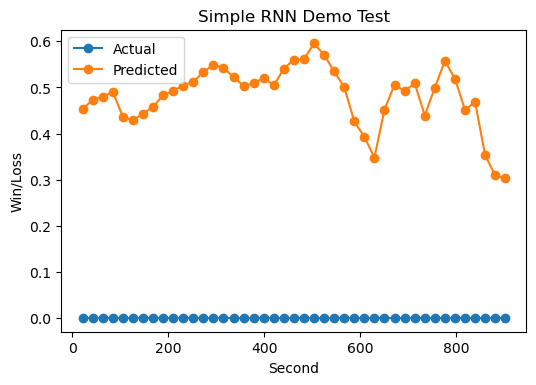

In [27]:
# plotting the line 1 points 
plt.plot(Y_Time, Y_demo_test, label = "Actual", marker='o',)

# plotting the line 2 points 
plt.plot(Y_Time, simple_pred, label = "Predicted", marker='o',)
plt.xlabel('Second')
plt.ylabel('Win/Loss')
# Set a title of the current axes.
plt.title('Simple RNN Demo Test')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [28]:
#DENSE MODEL

dense_model = tf.keras.Sequential()
dense_model.add(tf.keras.layers.Dense(units=125, activation='sigmoid', input_shape=(win_length, num_features)))
dense_model.add(tf.keras.layers.Dense(units=5, activation='sigmoid'))
dense_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

dense_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_dense = dense_model.fit_generator(train_generator,epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['Dense'] = dense_model.evaluate(val_generator)
performance['Dense'] = dense_model.evaluate(test_generator, verbose=0)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
2032/2032 [==============================] - 17s 9ms/step - loss: 0.6905 - binary_accuracy: 0.5350 - precision_2: 0.5381 - recall_2: 0.4556 - auc_2: 0.5481 - val_loss: 0.6886 - val_binary_accuracy: 0.5386 - val_precision_2: 0.6504 - val_recall_2: 0.3394 - val_auc_2: 0.5978
Epoch 2/100
2032/2032 [==============================] - 18s 9ms/step - loss: 0.6785 - binary_accuracy: 0.5627 - precision_2: 0.5712 - recall_2: 0.4822 - auc_2: 0.5899 - val_loss: 0.6875 - val_binary_accuracy: 0.5420 - val_precision_2: 0.6409 - val_recall_2: 0.3709 - val_auc_2: 0.59752 - ETA: 3s - - ETA: 0s - loss: 0.6774 - binary_accuracy: 0.5645 - precision_2: 0.576 - ETA: 0s - loss: 0.6785 - binary_accuracy: 0.5624 - precision_2: 0.5714 - recall_2: 0.4828 - auc_2: 0.
Epoch 3/100
2032/2032 [==============================] - 18s 9ms/step - loss: 0.6727 - binary_accuracy: 0.5747 - precision_2: 0.5821 - recall_2: 0.5120 - auc_2: 0.

In [29]:
dense_pred = dense_model.predict(test_generator)
dense_pred = pd.Series(dense_pred.flatten())

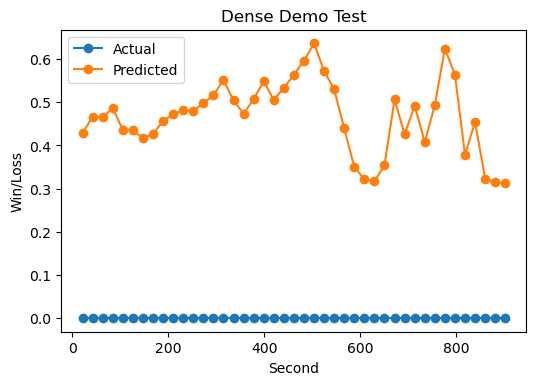

In [30]:
# plotting the line 1 points 
plt.plot(Y_Time, Y_demo_test, label = "Actual", marker='o',)

# plotting the line 2 points 
plt.plot(Y_Time, dense_pred, label = "Predicted", marker='o',)
plt.xlabel('Second')
plt.ylabel('Win/Loss')
# Set a title of the current axes.
plt.title('Dense Demo Test')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [31]:
#LSTM MODEL
lstm_model = tf.keras.Sequential()
lstm_model.add(tf.keras.layers.LSTM(39, input_shape=(win_length, num_features), return_sequences=True))
lstm_model.add(tf.keras.layers.Dropout(0.8))
lstm_model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

lstm_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_lstm = lstm_model.fit(train_generator, epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['LSTM'] = lstm_model.evaluate(val_generator)
performance['LSTM'] = lstm_model.evaluate(test_generator, verbose=0)

Epoch 1/100
2032/2032 [==============================] - 18s 9ms/step - loss: 0.6933 - binary_accuracy: 0.5297 - precision_3: 0.5293 - recall_3: 0.4861 - auc_3: 0.5422 - val_loss: 0.6831 - val_binary_accuracy: 0.5612 - val_precision_3: 0.6370 - val_recall_3: 0.4608 - val_auc_3: 0.6030.7135 - binary_accuracy: 0.4923 - precision_3: 0.4718 - recall_ - ETA:  - ETA: 7s - loss: 0.6992 - binary_accuracy: 0.5156 - precision_3: 0.5057 - recall_3: 0.4336 - auc_3: 0. - ETA: 7s - loss: 0 - ETA: 5s - loss: 0.6934 - binary_accuracy: 0.5302 - precision_3: 0.5410 - recall_3: 0.5233 - auc_3:  - ETA: 5s - loss: 0.6933 - binary_accuracy: 0.5309 - precision_3: 0.5443 - recall_3: 0.5253 - auc_3: 0. - ETA: 2s - loss: 0.6930 - binary_accuracy: 0.5311 - precision_3: 0.5355 - recall_3: 0. - ETA: 1s - loss: 0.6926 - binary_accuracy: 0.5314 - precision_3: 0.5347 - recall_3: 0.5039 - auc_3 - ETA: 1s - loss: 0.6928 - binary_accuracy: 0.5315 - precision_3: 0.5319 - recall_3: 0.50 - ETA: 0s - loss: 0.6929 - binary_a

In [32]:
lstm_pred = lstm_model.predict(test_generator)
lstm_pred = pd.Series(lstm_pred.flatten())

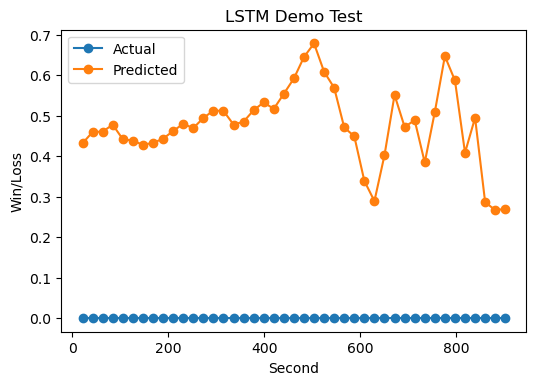

In [33]:
# plotting the line 1 points 
plt.plot(Y_Time, Y_demo_test, label = "Actual", marker='o',)

# plotting the line 2 points 
plt.plot(Y_Time, lstm_pred, label = "Predicted", marker='o',)
plt.xlabel('Second')
plt.ylabel('Win/Loss')
# Set a title of the current axes.
plt.title('LSTM Demo Test')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [34]:
#GRU MODEL

gru_model = tf.keras.models.Sequential()
gru_model.add(tf.keras.layers.GRU(12, return_sequences=True, input_shape=(win_length, num_features)))
gru_model.add(tf.keras.layers.Dropout(0.5))
gru_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

gru_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_gru = gru_model.fit(train_generator, epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['GRU'] = gru_model.evaluate(val_generator)
performance['GRU'] = gru_model.evaluate(test_generator, verbose=0)

Epoch 1/100
2032/2032 [==============================] - 18s 9ms/step - loss: 0.6907 - binary_accuracy: 0.5301 - precision_4: 0.5294 - recall_4: 0.4924 - auc_4: 0.5456 - val_loss: 0.6821 - val_binary_accuracy: 0.5583 - val_precision_4: 0.6361 - val_recall_4: 0.4511 - val_auc_4: 0.5997: 0.6908 - binary_accuracy: 0.5293 - precision_4: 0.5351 - recall_4: 0. - ETA: 3s - loss: 0 - ETA: 0s - loss: 0.6900 - binary_accuracy: 0.5309 - precision_4: 0.5335 - recall_4: 0. - ETA: 0s - loss: 0.6909 - binary_accuracy: 0.5294 - precision_4: 0.5294 - recall_4: 0.4937 - auc_4
Epoch 2/100
2032/2032 [==============================] - 17s 9ms/step - loss: 0.6775 - binary_accuracy: 0.5635 - precision_4: 0.5701 - recall_4: 0.4955 - auc_4: 0.5955 - val_loss: 0.6786 - val_binary_accuracy: 0.5643 - val_precision_4: 0.6262 - val_recall_4: 0.5060 - val_auc_4: 0.6015: 0.6733 - binary_accuracy: 0.5727 - precision_4: 0.5913 - recall_4: 0.5275 - ETA: 4s - loss: 0.6743 - binary_accuracy: 0.5707 - precision_4: 0.5848 -

In [35]:
gru_pred = gru_model.predict(test_generator)
gru_pred = pd.Series(gru_pred.flatten())

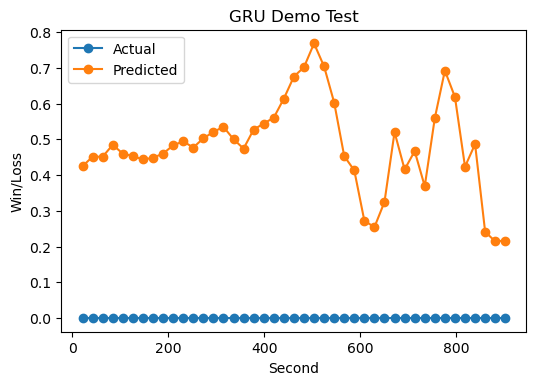

In [36]:
# plotting the line 1 points 
plt.plot(Y_Time, Y_demo_test, label = "Actual", marker='o',)

# plotting the line 2 points 
plt.plot(Y_Time, gru_pred, label = "Predicted", marker='o',)
plt.xlabel('Second')
plt.ylabel('Win/Loss')
# Set a title of the current axes.
plt.title('GRU Demo Test')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()